In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress

2022-10-09 10:26:42.334835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [3]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [4]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [5]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [6]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [7]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [8]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [9]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [10]:
df.price.min()

20.0

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

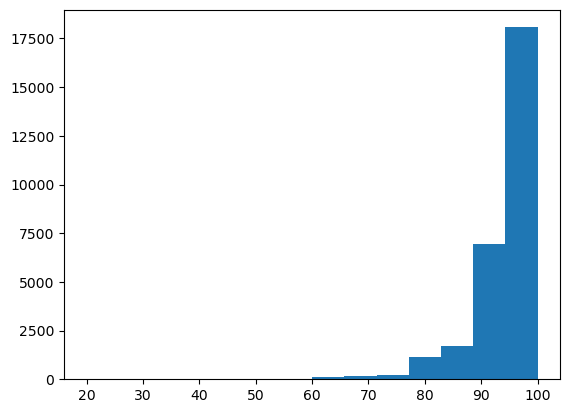

In [11]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

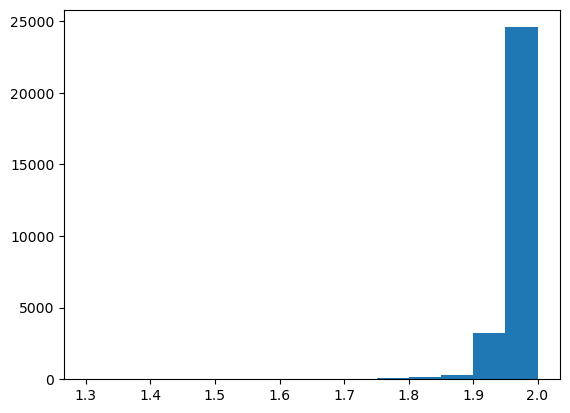

In [12]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [13]:
df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

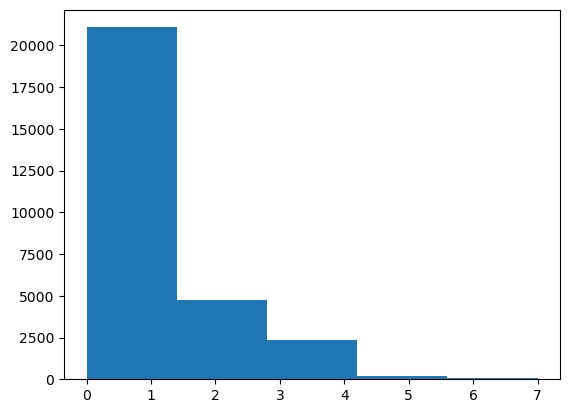

In [14]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

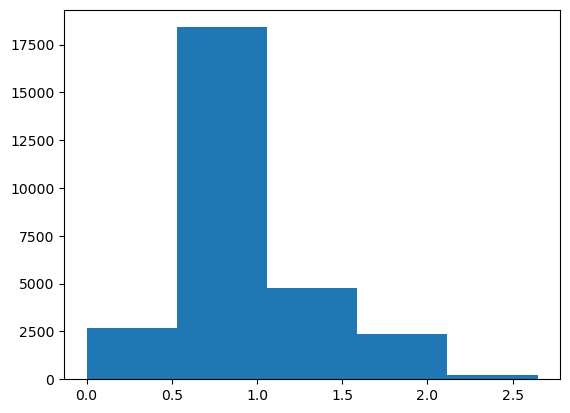

In [15]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [16]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

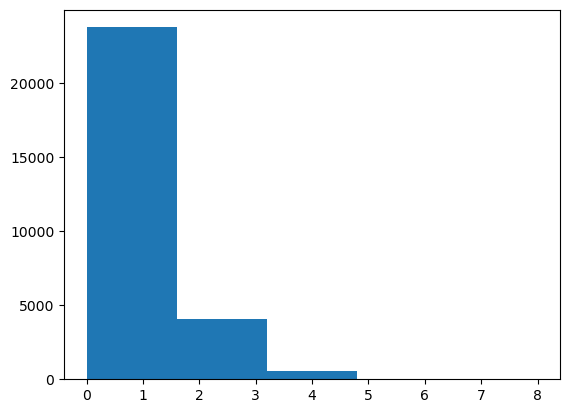

In [17]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

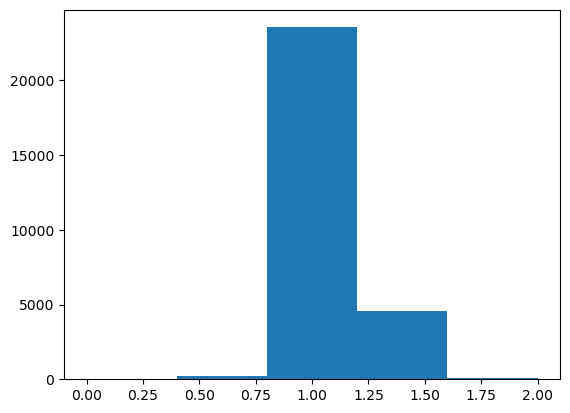

In [18]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [19]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

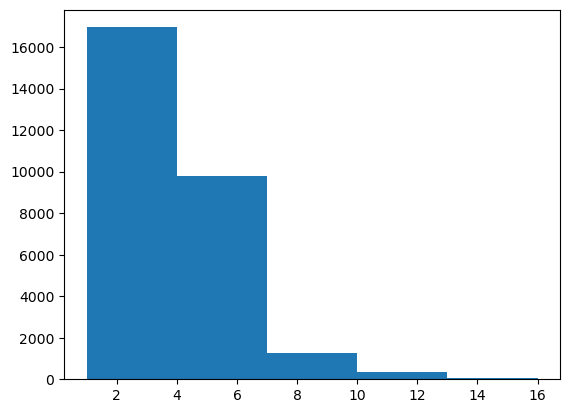

In [20]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

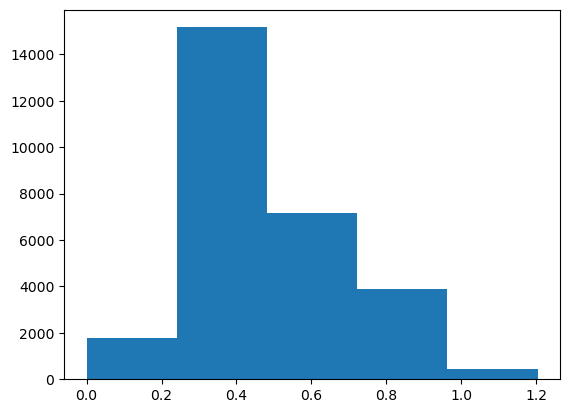

In [21]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [22]:
df['accommodates']=df['accommodates'].apply(np.log10)

(array([2.753e+04, 6.620e+02, 1.990e+02, 2.600e+01, 2.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

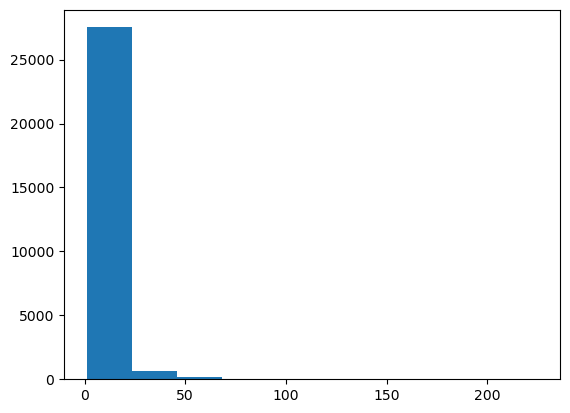

In [23]:
plt.hist(df.beds.apply(lambda x: pow(x,2)), bins =10)

In [24]:
df.beds = df.beds.apply(lambda x: pow(x,2))

In [25]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [27]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X = df.drop(columns=['price'])
y = df['price']

In [29]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-0.49392287, -0.19697252,  0.59748913, ..., -0.29365046,
        -0.2925192 , -0.3015807 ],
       [ 0.86392356,  1.12088022, -1.98335778, ..., -0.29365046,
        -0.2925192 , -0.3015807 ],
       [ 1.62646719, -1.03450791, -0.69293432, ..., -0.29365046,
        -0.2925192 , -0.3015807 ],
       ...,
       [-1.50981481, -1.4226335 , -0.69293432, ..., -0.29365046,
        -0.2925192 , -0.3015807 ],
       [ 1.08710277,  1.36390157,  0.06191501, ..., -0.29365046,
        -0.2925192 , -0.3015807 ],
       [-0.6113137 , -0.06194461, -0.69293432, ...,  3.40540927,
        -0.2925192 , -0.3015807 ]])

In [33]:
y_train

10989    227.066667
18850     49.000000
13755     60.333333
4193     125.451613
27223     82.000000
            ...    
1805     130.000000
13351    100.000000
13969     75.000000
19190     65.000000
12801     96.333333
Name: price, Length: 21339, dtype: float64

In [34]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
#     Dense(50, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36,001
Trainable params: 36,001
Non-trainable params: 0
_________________________________________________________________


2022-10-09 10:26:51.018037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


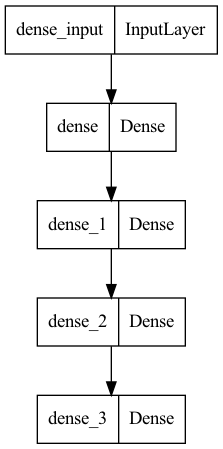

In [35]:
tf.keras.utils.plot_model(model)

In [36]:
model.compile(optimizer='adam',loss='mse')

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test))

Epoch 1/500
667/667 [==============================] - 2s 2ms/step - loss: 5956.2183 - val_loss: 3875.7688
Epoch 2/500
667/667 [==============================] - 1s 2ms/step - loss: 3924.8303 - val_loss: 3850.6028
Epoch 3/500
667/667 [==============================] - 1s 2ms/step - loss: 3755.4277 - val_loss: 3582.0303
Epoch 4/500
667/667 [==============================] - 1s 2ms/step - loss: 3644.9468 - val_loss: 3547.2156
Epoch 5/500
667/667 [==============================] - 1s 2ms/step - loss: 3579.5383 - val_loss: 3493.5674
Epoch 6/500
667/667 [==============================] - 1s 2ms/step - loss: 3484.0205 - val_loss: 3474.5618
Epoch 7/500
667/667 [==============================] - 1s 2ms/step - loss: 3413.0540 - val_loss: 3390.9128
Epoch 8/500
667/667 [==============================] - 1s 2ms/step - loss: 3307.6035 - val_loss: 3341.4421
Epoch 9/500
667/667 [==============================] - 2s 3ms/step - loss: 3232.4209 - val_loss: 3326.9431
Epoch 10/500
667/667 [===============

667/667 [==============================] - 1s 2ms/step - loss: 794.4782 - val_loss: 1338.4908
Epoch 78/500
667/667 [==============================] - 1s 2ms/step - loss: 768.6591 - val_loss: 1290.5037
Epoch 79/500
667/667 [==============================] - 1s 2ms/step - loss: 753.5602 - val_loss: 1293.1599
Epoch 80/500
667/667 [==============================] - 1s 2ms/step - loss: 761.1364 - val_loss: 1347.0149
Epoch 81/500
667/667 [==============================] - 1s 2ms/step - loss: 745.1865 - val_loss: 1397.5323
Epoch 82/500
667/667 [==============================] - 1s 2ms/step - loss: 765.3050 - val_loss: 1235.9637
Epoch 83/500
667/667 [==============================] - 1s 2ms/step - loss: 699.3367 - val_loss: 1349.6952
Epoch 84/500
667/667 [==============================] - 1s 2ms/step - loss: 759.8818 - val_loss: 1245.0826
Epoch 85/500
667/667 [==============================] - 2s 2ms/step - loss: 717.4869 - val_loss: 1186.5679
Epoch 86/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 415.9598 - val_loss: 968.8406
Epoch 154/500
667/667 [==============================] - 1s 2ms/step - loss: 442.9966 - val_loss: 922.2767
Epoch 155/500
667/667 [==============================] - 1s 2ms/step - loss: 409.5103 - val_loss: 1028.3566
Epoch 156/500
667/667 [==============================] - 1s 2ms/step - loss: 452.4113 - val_loss: 913.3491
Epoch 157/500
667/667 [==============================] - 1s 2ms/step - loss: 408.2762 - val_loss: 946.8862
Epoch 158/500
667/667 [==============================] - 1s 2ms/step - loss: 395.6137 - val_loss: 1009.1678
Epoch 159/500
667/667 [==============================] - 2s 2ms/step - loss: 425.9227 - val_loss: 980.4161
Epoch 160/500
667/667 [==============================] - 2s 3ms/step - loss: 407.9717 - val_loss: 926.7718
Epoch 161/500
667/667 [==============================] - 2s 2ms/step - loss: 437.7652 - val_loss: 962.6475
Epoch 162/500
667/667 [==========================

667/667 [==============================] - 2s 2ms/step - loss: 283.7188 - val_loss: 893.8827
Epoch 230/500
667/667 [==============================] - 2s 2ms/step - loss: 292.9720 - val_loss: 796.8475
Epoch 231/500
667/667 [==============================] - 1s 2ms/step - loss: 286.0185 - val_loss: 804.6367
Epoch 232/500
667/667 [==============================] - 1s 2ms/step - loss: 293.1413 - val_loss: 884.8054
Epoch 233/500
667/667 [==============================] - 1s 2ms/step - loss: 294.3543 - val_loss: 853.4072
Epoch 234/500
667/667 [==============================] - 1s 2ms/step - loss: 289.6543 - val_loss: 855.4695
Epoch 235/500
667/667 [==============================] - 1s 2ms/step - loss: 311.2679 - val_loss: 860.5136
Epoch 236/500
667/667 [==============================] - 1s 2ms/step - loss: 304.8849 - val_loss: 899.3038
Epoch 237/500
667/667 [==============================] - 1s 2ms/step - loss: 293.3110 - val_loss: 775.0076
Epoch 238/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 230.9014 - val_loss: 780.0396
Epoch 306/500
667/667 [==============================] - 1s 2ms/step - loss: 216.5554 - val_loss: 822.0976
Epoch 307/500
667/667 [==============================] - 1s 2ms/step - loss: 219.6934 - val_loss: 807.4722
Epoch 308/500
667/667 [==============================] - 1s 2ms/step - loss: 232.4235 - val_loss: 774.4690
Epoch 309/500
667/667 [==============================] - 1s 2ms/step - loss: 214.7268 - val_loss: 747.5240
Epoch 310/500
667/667 [==============================] - 1s 2ms/step - loss: 213.3404 - val_loss: 779.9952
Epoch 311/500
667/667 [==============================] - 1s 2ms/step - loss: 214.5777 - val_loss: 740.2551
Epoch 312/500
667/667 [==============================] - 1s 2ms/step - loss: 212.5088 - val_loss: 768.0729
Epoch 313/500
667/667 [==============================] - 1s 2ms/step - loss: 224.1145 - val_loss: 756.2605
Epoch 314/500
667/667 [============================

667/667 [==============================] - 2s 3ms/step - loss: 172.8035 - val_loss: 687.0412
Epoch 382/500
667/667 [==============================] - 2s 3ms/step - loss: 182.3199 - val_loss: 710.2192
Epoch 383/500
667/667 [==============================] - 2s 3ms/step - loss: 174.8228 - val_loss: 712.2640
Epoch 384/500
667/667 [==============================] - 2s 3ms/step - loss: 177.2482 - val_loss: 698.7007
Epoch 385/500
667/667 [==============================] - 2s 3ms/step - loss: 172.6566 - val_loss: 710.9601
Epoch 386/500
667/667 [==============================] - 2s 3ms/step - loss: 181.8645 - val_loss: 686.6235
Epoch 387/500
667/667 [==============================] - 2s 3ms/step - loss: 176.6221 - val_loss: 720.6488
Epoch 388/500
667/667 [==============================] - 2s 3ms/step - loss: 174.4832 - val_loss: 713.3040
Epoch 389/500
667/667 [==============================] - 2s 3ms/step - loss: 178.0882 - val_loss: 668.1700
Epoch 390/500
667/667 [============================

667/667 [==============================] - 2s 3ms/step - loss: 149.1041 - val_loss: 682.1790
Epoch 458/500
667/667 [==============================] - 2s 3ms/step - loss: 158.6586 - val_loss: 664.3434
Epoch 459/500
667/667 [==============================] - 2s 3ms/step - loss: 150.7554 - val_loss: 663.7505
Epoch 460/500
667/667 [==============================] - 2s 3ms/step - loss: 148.6158 - val_loss: 666.8516
Epoch 461/500
667/667 [==============================] - 2s 3ms/step - loss: 152.1234 - val_loss: 667.7898
Epoch 462/500
667/667 [==============================] - 2s 3ms/step - loss: 149.0430 - val_loss: 666.6248
Epoch 463/500
667/667 [==============================] - 2s 3ms/step - loss: 144.4175 - val_loss: 687.4874
Epoch 464/500
667/667 [==============================] - 2s 3ms/step - loss: 146.9467 - val_loss: 652.8604
Epoch 465/500
667/667 [==============================] - 2s 3ms/step - loss: 152.9823 - val_loss: 704.0471
Epoch 466/500
667/667 [============================

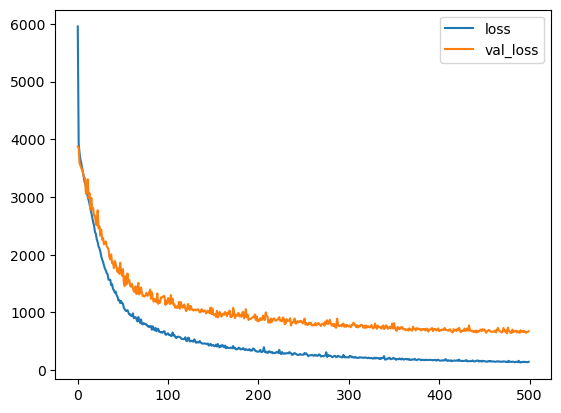

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 1s 2ms/step


Text(0.5, 0, 'predicted price')

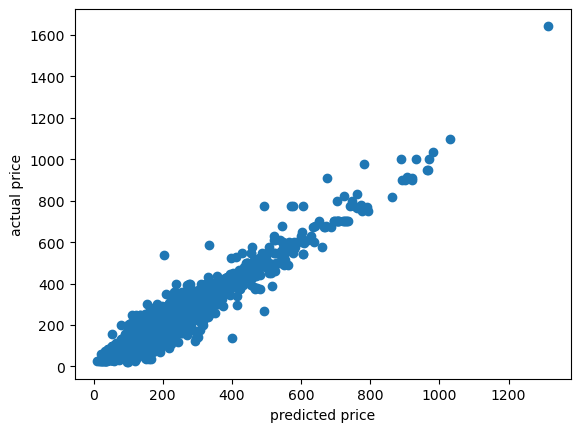

In [40]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [41]:
y_pred.tolist()

[[128.16204833984375],
 [79.5954360961914],
 [63.337162017822266],
 [77.00563049316406],
 [52.902427673339844],
 [200.57571411132812],
 [124.81656646728516],
 [175.37939453125],
 [88.73896026611328],
 [66.93736267089844],
 [113.02396392822266],
 [84.45003509521484],
 [54.315277099609375],
 [121.64350128173828],
 [74.20211791992188],
 [65.84352111816406],
 [63.27954864501953],
 [48.837440490722656],
 [37.65538787841797],
 [93.54192352294922],
 [68.68550109863281],
 [105.97357177734375],
 [83.30255126953125],
 [136.50640869140625],
 [91.14710235595703],
 [70.11846160888672],
 [245.69276428222656],
 [165.98846435546875],
 [188.37954711914062],
 [139.42373657226562],
 [144.9814910888672],
 [296.6667175292969],
 [472.3175354003906],
 [144.44635009765625],
 [240.45358276367188],
 [112.72374725341797],
 [421.17889404296875],
 [216.05079650878906],
 [93.85836791992188],
 [212.08164978027344],
 [96.6758804321289],
 [250.00314331054688],
 [140.6287841796875],
 [85.56053161621094],
 [19.432348251

In [42]:
y_test.values.tolist()

[125.33333333333333,
 85.45161290322581,
 56.0,
 37.666666666666664,
 48.06896551724138,
 155.0,
 138.61290322580646,
 168.0,
 82.0,
 65.0,
 121.51724137931035,
 101.22222222222223,
 60.0,
 125.0,
 75.0,
 63.0,
 79.0,
 59.0,
 40.0,
 82.12903225806451,
 75.0,
 114.23076923076923,
 90.0,
 150.0,
 90.0,
 65.0,
 199.0,
 155.0,
 175.0,
 142.0,
 121.75862068965517,
 287.0,
 379.83870967741933,
 76.0,
 185.0,
 82.0,
 438.26666666666665,
 245.0,
 88.0,
 216.80645161290323,
 115.66666666666667,
 295.6896551724138,
 110.0,
 98.15789473684211,
 26.454545454545453,
 130.0,
 220.0,
 50.0,
 125.0,
 369.0,
 195.0,
 115.0,
 150.0,
 97.0,
 109.1,
 55.0,
 49.0,
 108.87096774193549,
 159.0,
 60.0,
 141.0,
 65.0,
 200.0,
 100.0,
 35.81818181818182,
 178.0,
 75.0,
 132.5,
 65.0,
 78.87096774193549,
 125.51724137931035,
 56.0,
 125.0,
 145.0,
 100.0,
 115.0,
 44.0,
 60.0,
 125.0,
 156.8695652173913,
 65.0,
 101.0,
 100.0,
 95.0,
 125.0,
 99.23076923076923,
 125.0,
 55.0,
 123.87096774193549,
 129.0,
 54.0,


In [43]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,128.162048
1,79.595436
2,63.337162
3,77.005630
4,52.902428


In [44]:
results_df['actual price'] = y_test.values

In [45]:
results_df.head(20)

,predicted price,actual price
0,128.162048,125.333333
1,79.595436,85.451613
2,63.337162,56.000000
3,77.005630,37.666667
4,52.902428,48.068966
5,200.575714,155.000000
6,124.816566,138.612903
7,175.379395,168.000000
8,88.738960,82.000000
9,66.937363,65.000000


In [46]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff
0,128.162048,125.333333,2.828715
1,79.595436,85.451613,5.856177
2,63.337162,56.000000,7.337162
3,77.005630,37.666667,39.338964
4,52.902428,48.068966,4.833462
...,...,...,...
7109,131.198959,133.064516,1.865557
7110,212.384827,204.545455,7.839372
7111,160.987854,165.000000,4.012146
7112,61.472733,53.000000,8.472733


In [47]:
rmse = np.sqrt(history.history['val_loss'][-1])
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - 2*rmse)
results_df['upper'] = round(results_df['predicted price'] + 2*rmse)

results_df.loc[results_df['lower'] < 20, 'lower'] = 20

results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,131.198959,133.064516,1.865557,79.0,183.0,True
7110,212.384827,204.545455,7.839372,160.0,264.0,True
7111,160.987854,165.000000,4.012146,109.0,213.0,True
7112,61.472733,53.000000,8.472733,20.0,113.0,True
7113,147.021759,195.000000,47.978241,95.0,199.0,True


In [48]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,128.162048,125.333333,2.828715,76.0,180.0,True
1,79.595436,85.451613,5.856177,28.0,132.0,True
2,63.337162,56.000000,7.337162,20.0,115.0,True
3,77.005630,37.666667,39.338964,25.0,129.0,True
4,52.902428,48.068966,4.833462,20.0,105.0,True
5,200.575714,155.000000,45.575714,149.0,253.0,True
6,124.816566,138.612903,13.796337,73.0,177.0,True
7,175.379395,168.000000,7.379395,123.0,227.0,True
8,88.738960,82.000000,6.738960,37.0,141.0,True
9,66.937363,65.000000,1.937363,20.0,119.0,True


In [49]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
32,472.317535,379.83871,92.478826,420.0,524.0,False
33,144.446350,76.00000,68.446350,92.0,196.0,False
34,240.453583,185.00000,55.453583,188.0,292.0,False
49,285.233917,369.00000,83.766083,233.0,337.0,False
54,176.157562,109.10000,67.057562,124.0,228.0,False
...,...,...,...,...,...,...
7068,520.658325,610.00000,89.341675,469.0,573.0,False
7076,100.640648,22.00000,78.640648,49.0,153.0,False
7082,154.729416,300.00000,145.270584,103.0,207.0,False
7083,191.152496,69.00000,122.152496,139.0,243.0,False


In [50]:
results_df['accurate'].value_counts()

True     6769
False     345
Name: accurate, dtype: int64

In [51]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.9515040764689345

In [52]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [53]:
print('r value:',r_value)

r value: 0.9690915658579982
